In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [2]:
with_mask_images = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

without_mask_images = os.listdir('//kaggle/input/face-mask-dataset/data/without_mask')

In [3]:
print("Numvber of with mask images", len(with_mask_images), " and without mask images are ", len(without_mask_images))

Numvber of with mask images 3725  and without mask images are  3828


# **Creating labels for two class of images**

with mask -> 1
without mask -> 0

In [4]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [5]:
labels = with_mask_labels + without_mask_labels



# Showing images of with and without mask

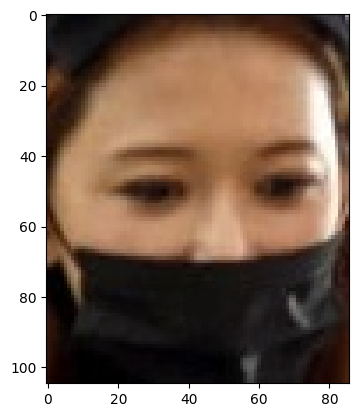

In [6]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_100.jpg')

imgplot = plt.imshow(img)

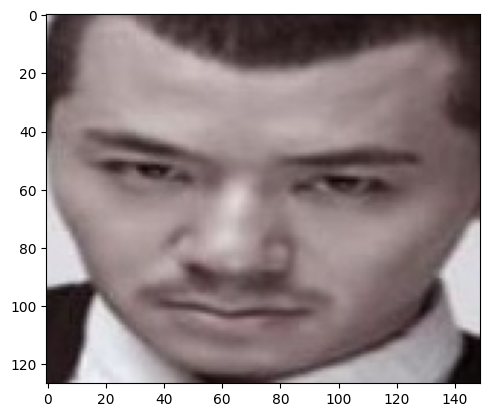

In [7]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_100.jpg')

imgplot = plt.imshow(img)

# Resizing the images
- resize the images
- convert the images to numpy array


In [8]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_images:
    
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
    
print("Completed with mask processing.")

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_images:
    
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
    

print("Completed without mask processing.")


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Completed with mask processing.
Completed without mask processing.


In [9]:
len(data)

7553

In [10]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [11]:
data[0].shape

(128, 128, 3)

# Converting image list and label lsit to numpy array

In [12]:
X = np.array(data)

Y = np.array(labels)

# Train and test spliting and samling of data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2) 

In [14]:
X_train_scaled = X_train/255

X_test_sclaed = X_test/255

In [15]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

# Building a CNN

In [16]:
import tensorflow as tf
from tensorflow import keras


In [17]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))

model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))


model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'))

model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))

model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the neural network

model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
              metrics=['acc']
             )

In [19]:
# training the neural network

history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 5 )

Epoch 1/5


I0000 00:00:1727367762.038203      97 service.cc:145] XLA service 0x7b36c400c4d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727367762.038261      97 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 23/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5917 - loss: 1.0167

I0000 00:00:1727367767.217951      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - acc: 0.7553 - loss: 0.5948 - val_acc: 0.9058 - val_loss: 0.2564
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8800 - loss: 0.2908 - val_acc: 0.9174 - val_loss: 0.2102
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8753 - loss: 0.2959 - val_acc: 0.9190 - val_loss: 0.1921
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9103 - loss: 0.2206 - val_acc: 0.9355 - val_loss: 0.1682
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9298 - loss: 0.1813 - val_acc: 0.9405 - val_loss: 0.1595


# Evaluating the model

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print("test accuracy is ", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9166 - loss: 34.9962
test accuracy is  0.9166114926338196


# PLotting the loss and accuracy

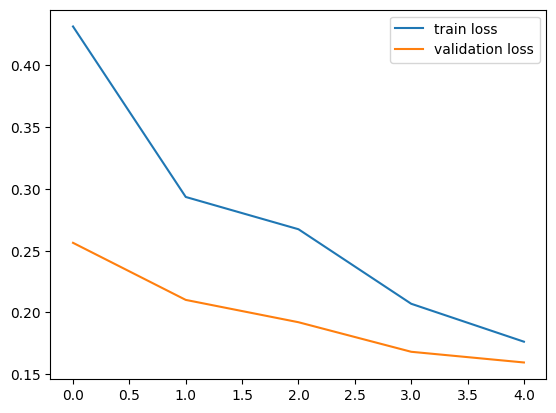

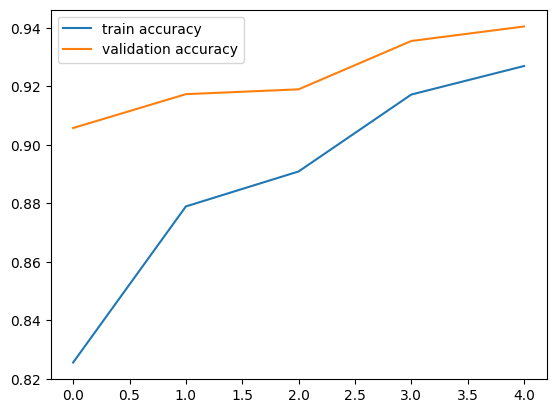

In [23]:
h = history

# plotting the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# plotting the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()


# Predicting the images

Path of the image to be predicted:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_1024.jpg


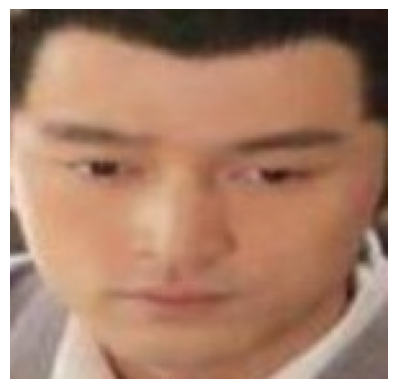

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.13264456 0.7407607 ]]
1
The person in the image is wearing a mask


In [42]:
# Input image path
input_image_path = input('Path of the image to be predicted: ')

# Load the image using OpenCV
input_image = cv2.imread(input_image_path)

# Convert BGR (OpenCV default) to RGB for displaying with matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib (since cv2.imshow doesn't work in Kaggle)
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axis
plt.show()

# Resize the image to (128, 128)
input_image_resized = cv2.resize(input_image, (128,128))

# Normalize pixel values
input_image_scaled = input_image_resized / 255.0

# Reshape to fit model input
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Predict the class
input_prediction = model.predict(input_image_reshaped)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Print the prediction and label
print(input_prediction)
print(input_pred_label)

# Check prediction result
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')